In [1]:
# Pytorch for Neural Network Implemenation
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# CIFAR10 dataset for classifying images (10 classes)
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Prepare data for training
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

In [14]:
# Neural Network Architecture: Simple convolutional network for image classification (from pytorch docummentation)
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [36]:
# Function for training the Neural Network given an optimizer and the Neural Network
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
epochs = 3
def train_ImageNet(optimizer, net):
    loss_its = []
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 1000 == 999:
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.3f}')
                loss_its.append(running_loss / 1000)
                running_loss = 0.0
    return loss_its

In [40]:
# Use Stochastic Gradient Descent for the optimizer (stepsize: lr)
net_SGD = Net()
SGD = optim.SGD(net_SGD.parameters(), lr = 0.001)
loss_SGD = train_ImageNet(SGD, net_SGD)

[1,  1000] loss: 2.303
[1,  2000] loss: 2.301
[1,  3000] loss: 2.298
[1,  4000] loss: 2.297
[1,  5000] loss: 2.292
[1,  6000] loss: 2.287
[1,  7000] loss: 2.278
[1,  8000] loss: 2.266
[1,  9000] loss: 2.225
[1, 10000] loss: 2.177
[1, 11000] loss: 2.122
[1, 12000] loss: 2.080
[2,  1000] loss: 2.043
[2,  2000] loss: 2.027
[2,  3000] loss: 2.006
[2,  4000] loss: 1.996
[2,  5000] loss: 1.981
[2,  6000] loss: 1.944
[2,  7000] loss: 1.939
[2,  8000] loss: 1.908
[2,  9000] loss: 1.885
[2, 10000] loss: 1.856
[2, 11000] loss: 1.838
[2, 12000] loss: 1.803
[3,  1000] loss: 1.771
[3,  2000] loss: 1.749
[3,  3000] loss: 1.720
[3,  4000] loss: 1.709
[3,  5000] loss: 1.697
[3,  6000] loss: 1.673
[3,  7000] loss: 1.650
[3,  8000] loss: 1.650
[3,  9000] loss: 1.646
[3, 10000] loss: 1.604
[3, 11000] loss: 1.597
[3, 12000] loss: 1.599


In [38]:
# Use Stochastic Gradient Descent with Momentum for the optimizer (stepsize: lr, Momentum parameter: momumtum)
net_SGDM = Net()
SGDM = optim.SGD(net_SGDM.parameters(), lr = 0.001, momentum=0.9)
loss_SGDM = train_ImageNet(SGDM, net_SGDM)

[1,  1000] loss: 2.301
[1,  2000] loss: 2.237
[1,  3000] loss: 1.956
[1,  4000] loss: 1.801
[1,  5000] loss: 1.731
[1,  6000] loss: 1.652
[1,  7000] loss: 1.615
[1,  8000] loss: 1.597
[1,  9000] loss: 1.560
[1, 10000] loss: 1.531
[1, 11000] loss: 1.498
[1, 12000] loss: 1.468
[2,  1000] loss: 1.445
[2,  2000] loss: 1.405
[2,  3000] loss: 1.426
[2,  4000] loss: 1.353
[2,  5000] loss: 1.346
[2,  6000] loss: 1.341
[2,  7000] loss: 1.359
[2,  8000] loss: 1.330
[2,  9000] loss: 1.340
[2, 10000] loss: 1.308
[2, 11000] loss: 1.276
[2, 12000] loss: 1.298
[3,  1000] loss: 1.208
[3,  2000] loss: 1.223
[3,  3000] loss: 1.182
[3,  4000] loss: 1.239
[3,  5000] loss: 1.201
[3,  6000] loss: 1.186
[3,  7000] loss: 1.224
[3,  8000] loss: 1.207
[3,  9000] loss: 1.205
[3, 10000] loss: 1.201
[3, 11000] loss: 1.204
[3, 12000] loss: 1.214


In [41]:
# Use RMSProp for the optimizer
net_RMS = Net()
RMS = optim.RMSprop(net_RMS.parameters(), lr = 0.001, alpha=0.99)
loss_RMS = train_ImageNet(RMS, net_RMS)

[1,  1000] loss: 1.989
[1,  2000] loss: 1.779
[1,  3000] loss: 1.715
[1,  4000] loss: 1.649
[1,  5000] loss: 1.596
[1,  6000] loss: 1.577
[1,  7000] loss: 1.527
[1,  8000] loss: 1.506
[1,  9000] loss: 1.482
[1, 10000] loss: 1.457
[1, 11000] loss: 1.450
[1, 12000] loss: 1.422
[2,  1000] loss: 1.372
[2,  2000] loss: 1.383
[2,  3000] loss: 1.405
[2,  4000] loss: 1.378
[2,  5000] loss: 1.346
[2,  6000] loss: 1.342
[2,  7000] loss: 1.385
[2,  8000] loss: 1.366
[2,  9000] loss: 1.367
[2, 10000] loss: 1.359
[2, 11000] loss: 1.358
[2, 12000] loss: 1.354
[3,  1000] loss: 1.292
[3,  2000] loss: 1.309
[3,  3000] loss: 1.256
[3,  4000] loss: 1.303
[3,  5000] loss: 1.295
[3,  6000] loss: 1.302
[3,  7000] loss: 1.287
[3,  8000] loss: 1.261
[3,  9000] loss: 1.307
[3, 10000] loss: 1.298
[3, 11000] loss: 1.287
[3, 12000] loss: 1.288


In [42]:
# Use Adam for the optimizer
net_Adam = Net()
Adam = optim.Adam(net_Adam.parameters(), lr = 0.001, betas=(0.9,0.999))
loss_Adam = train_ImageNet(Adam, net_Adam)

[1,  1000] loss: 2.034
[1,  2000] loss: 1.729
[1,  3000] loss: 1.650
[1,  4000] loss: 1.607
[1,  5000] loss: 1.530
[1,  6000] loss: 1.521
[1,  7000] loss: 1.447
[1,  8000] loss: 1.459
[1,  9000] loss: 1.399
[1, 10000] loss: 1.396
[1, 11000] loss: 1.344
[1, 12000] loss: 1.362
[2,  1000] loss: 1.317
[2,  2000] loss: 1.289
[2,  3000] loss: 1.291
[2,  4000] loss: 1.240
[2,  5000] loss: 1.269
[2,  6000] loss: 1.269
[2,  7000] loss: 1.241
[2,  8000] loss: 1.239
[2,  9000] loss: 1.244
[2, 10000] loss: 1.209
[2, 11000] loss: 1.227
[2, 12000] loss: 1.214
[3,  1000] loss: 1.129
[3,  2000] loss: 1.148
[3,  3000] loss: 1.161
[3,  4000] loss: 1.141
[3,  5000] loss: 1.188
[3,  6000] loss: 1.192
[3,  7000] loss: 1.138
[3,  8000] loss: 1.151
[3,  9000] loss: 1.135
[3, 10000] loss: 1.161
[3, 11000] loss: 1.165
[3, 12000] loss: 1.157


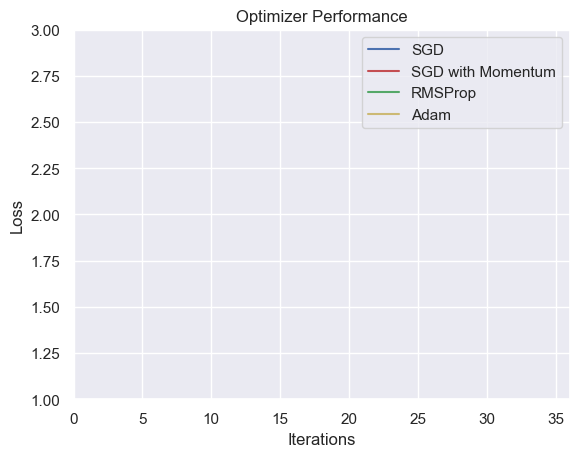

In [70]:
# Plot performance of the optimzier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from IPython.display import HTML

fig = plt.figure()
ax = plt.subplot()
ax.set_xlim((0,36))
ax.set_ylim((1,3))
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.set_title("Optimizer Performance")
sns.set_theme()
sgd_plot, = ax.plot([], [], 'b')
sgdm_plot, = ax.plot([], [], 'r')
rms_plot, = ax.plot([], [], 'g')
adam_plot, = ax.plot([], [], 'y')
ax.legend(["SGD","SGD with Momentum","RMSProp","Adam"])

In [71]:
def drawframe(n):
    x = np.linspace(1,n,n)
    sgd_plot.set_data(x,loss_SGD[0:n])
    sgdm_plot.set_data(x,loss_SGDM[0:n])
    rms_plot.set_data(x,loss_RMS[0:n])
    adam_plot.set_data(x,loss_Adam[0:n])
    return (sgd_plot,sgdm_plot,rms_plot,adam_plot)
anim = animation.FuncAnimation(fig, drawframe, frames=36, interval=200)
HTML(anim.to_html5_video())